In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Machine Leaning/AirPassengers.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.shape

(144, 1)

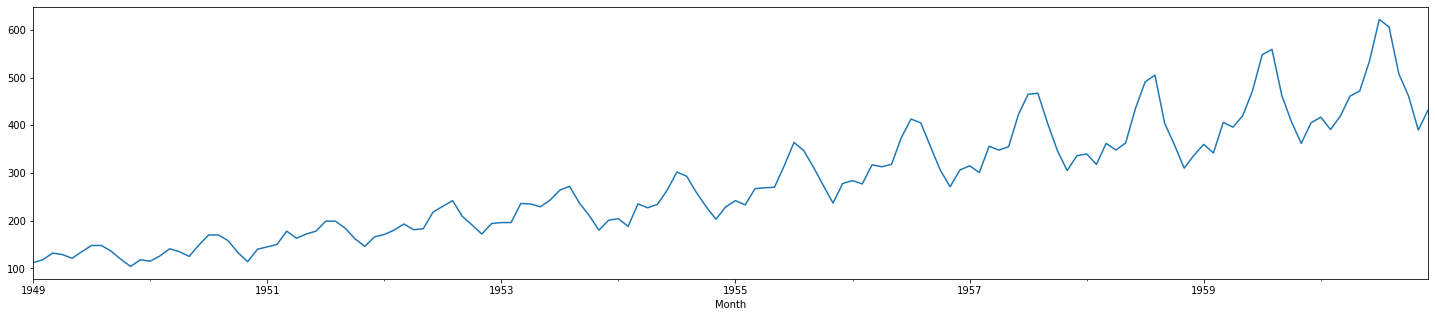

In [ ]:
df['#Passengers'].plot(figsize=(25,5))

In [ ]:
train, test = df[:-12], df[-12:]

In [ ]:
train.shape

(132, 1)

In [ ]:
test.shape

(12, 1)

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mape', 'mse'])

In [ ]:
model.fit_generator(generator,epochs=500)

Epoch 1/500
20/20 [==============================] - 0s 15ms/step - loss: 0.0086 - mape: 25.3927 - mse: 0.0086
Epoch 2/500
20/20 [==============================] - 0s 16ms/step - loss: 0.0107 - mape: 25.0410 - mse: 0.0107
Epoch 3/500
20/20 [==============================] - 0s 16ms/step - loss: 0.0081 - mape: 27.5546 - mse: 0.0081
Epoch 4/500
20/20 [==============================] - 0s 15ms/step - loss: 0.0069 - mape: 31.6635 - mse: 0.0069
Epoch 5/500
20/20 [==============================] - 0s 17ms/step - loss: 0.0074 - mape: 24.4354 - mse: 0.0074
Epoch 6/500
20/20 [==============================] - 0s 15ms/step - loss: 0.0067 - mape: 24.7712 - mse: 0.0067
Epoch 7/500
20/20 [==============================] - 0s 15ms/step - loss: 0.0116 - mape: 27.4210 - mse: 0.0116
Epoch 8/500
20/20 [==============================] - 0s 16ms/step - loss: 0.0078 - mape: 30.3250 - mse: 0.0078
Epoch 9/500
20/20 [==============================] - 0s 15ms/step - loss: 0.0065 - mape: 26.7772 - mse: 0.0065
E

KeyboardInterrupt: ignored

In [ ]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))
batch

array([[[0.56263736],
        [0.52307692],
        [0.66373626],
        [0.64175824],
        [0.69450549],
        [0.80879121],
        [0.97582418],
        [1.        ],
        [0.78901099],
        [0.66593407],
        [0.56703297],
        [0.66153846]]])

In [ ]:
batch[0][2]

array([0.66373626])

In [ ]:
prediksi = model.predict(batch[0])[0]

In [ ]:
prediksi

array([0.3866319], dtype=float32)

In [ ]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0])
    print(pred_list)
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)


[array([0.62352145], dtype=float32)]
[array([0.62352145], dtype=float32), array([0.6043983], dtype=float32)]
[array([0.62352145], dtype=float32), array([0.6043983], dtype=float32), array([0.69041437], dtype=float32)]
[array([0.62352145], dtype=float32), array([0.6043983], dtype=float32), array([0.69041437], dtype=float32), array([0.6984499], dtype=float32)]
[array([0.62352145], dtype=float32), array([0.6043983], dtype=float32), array([0.69041437], dtype=float32), array([0.6984499], dtype=float32), array([0.73923725], dtype=float32)]
[array([0.62352145], dtype=float32), array([0.6043983], dtype=float32), array([0.69041437], dtype=float32), array([0.6984499], dtype=float32), array([0.73923725], dtype=float32), array([0.87148064], dtype=float32)]
[array([0.62352145], dtype=float32), array([0.6043983], dtype=float32), array([0.69041437], dtype=float32), array([0.6984499], dtype=float32), array([0.73923725], dtype=float32), array([0.87148064], dtype=float32), array([1.0523964], dtype=float3

In [ ]:
pred_list

[array([0.62352145], dtype=float32),
 array([0.6043983], dtype=float32),
 array([0.69041437], dtype=float32),
 array([0.6984499], dtype=float32),
 array([0.73923725], dtype=float32),
 array([0.87148064], dtype=float32),
 array([1.0523964], dtype=float32),
 array([1.0745019], dtype=float32),
 array([0.8744856], dtype=float32),
 array([0.7180708], dtype=float32),
 array([0.64045197], dtype=float32),
 array([0.68868405], dtype=float32)]

In [ ]:
batch

array([[[0.62352145],
        [0.60439831],
        [0.69041437],
        [0.69844991],
        [0.73923725],
        [0.87148064],
        [1.05239642],
        [1.07450187],
        [0.87448561],
        [0.71807081],
        [0.64045197],
        [0.68868405]]])

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

In [ ]:
df_predict.tail()

,Prediction
Month,
1960-08-01,592.898352
1960-09-01,501.890953
1960-10-01,430.722216
1960-11-01,395.405645
1960-12-01,417.351241


In [ ]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [25.22115238]


In [ ]:
train = df

In [ ]:
scaler.fit(train)
train = scaler.transform(train)
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=32)

In [ ]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
5/5 [==============================] - 0s 25ms/step - loss: 0.0023
Epoch 2/90
5/5 [==============================] - 0s 21ms/step - loss: 0.0019
Epoch 3/90
5/5 [==============================] - 0s 20ms/step - loss: 0.0042
Epoch 4/90
5/5 [==============================] - 0s 21ms/step - loss: 0.0019
Epoch 5/90
5/5 [==============================] - 0s 24ms/step - loss: 0.0023
Epoch 6/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0016
Epoch 7/90
5/5 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 8/90
5/5 [==============================] - 0s 25ms/step - loss: 0.0014
Epoch 9/90
5/5 [==============================] - 0s 21ms/step - loss: 0.0017
Epoch 10/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 11/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 12/90
5/5 [==============================] - 0s 23ms/step - loss: 0.0018
Epoch 13/90
5/5 [==============================] - 0s 24ms/st

In [ ]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))
batch

array([[[0.6042471 ],
        [0.55405405],
        [0.60810811],
        [0.68918919],
        [0.71042471],
        [0.83204633],
        [1.        ],
        [0.96911197],
        [0.77992278],
        [0.68918919],
        [0.55212355],
        [0.63320463]]])

In [ ]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [ ]:
future_dates

,#Passengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

In [ ]:
df_predict.tail()

,Prediction
1961-08-01,648.806533
1961-09-01,552.100757
1961-10-01,483.277669
1961-11-01,429.200023
1961-12-01,450.234714


In [ ]:
df_proj

,#Passengers,Prediction
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1961-08-01,NaN,648.806533
1961-09-01,NaN,552.100757
1961-10-01,NaN,483.277669
1961-11-01,NaN,429.200023


No handles with labels found to put in legend.


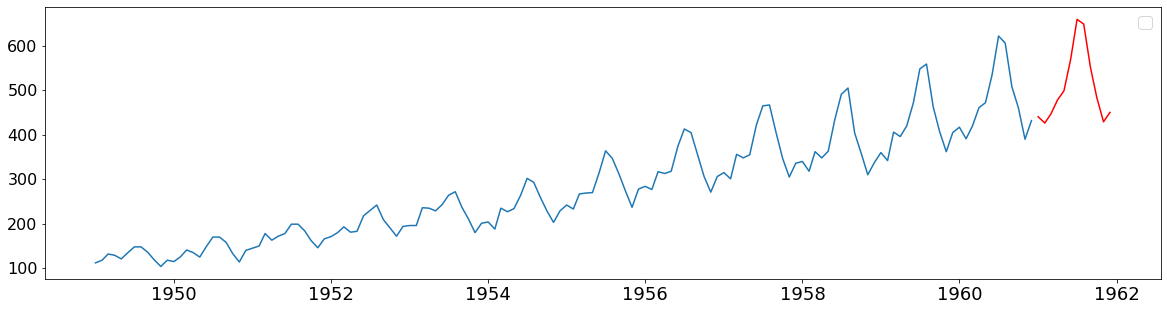

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['#Passengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# define dataset
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
# define generator
n_input = 2
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=1)

In [ ]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 8


In [ ]:
for i in range(len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[1 2]] => [3]
[[2 3]] => [4]
[[3 4]] => [5]
[[4 5]] => [6]
[[5 6]] => [7]
[[6 7]] => [8]
[[7 8]] => [9]
[[8 9]] => [10]


In [ ]:

# define generator
n_input = 4
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=8) #memeteakan input dengan output

In [ ]:
for i in range(len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]] => [ 5  6  7  8  9 10]


In [ ]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator, steps_per_epoch=1, epochs=200, verbose=0)

NameError: ignored

In [ ]:
# make a one step prediction out of sample
x_input = np.array([9, 10]).reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)

In [ ]:
yhat

array([[11.600236]], dtype=float32)